<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Project(SugarCane_Production).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv('List of Countries by Sugarcane Production (2).csv')

In [23]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [24]:
df.shape

(103, 7)

In [25]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [26]:
df.rename(columns={
    "Country": "Country",
    "Continent": "Continent",
    "Production (Tons)": "Production(Tons)",
    "Production per Person (Kg)": "Production_per_person(Kg)",
    "Acreage (Hectare)": "Acreage(Hectare)",
    "Yield (Kg / Hectare)": "Yield(Kg/Hectare)"
}, inplace=True)


In [27]:
df.isna().sum()

,0
Country,0
Continent,0
Production(Tons),0
Production_per_person(Kg),0
Acreage(Hectare),1
Yield(Kg/Hectare),1


Data Cleaning


In [28]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [29]:
df[df["Acreage(Hectare)"].isnull()]

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [30]:
df=df.dropna().reset_index()

In [31]:
df.head()

,index,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [32]:
df.drop(["index"],axis=1,inplace=True)

In [33]:
df.columns.tolist()

['Country',
 'Continent',
 'Production(Tons)',
 'Production_per_person(Kg)',
 'Acreage(Hectare)',
 'Yield(Kg/Hectare)']

In [34]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [35]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),object
Production_per_person(Kg),object
Acreage(Hectare),object
Yield(Kg/Hectare),object


In [36]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),object
Production_per_person(Kg),object
Acreage(Hectare),object
Yield(Kg/Hectare),object


In [37]:
import re

cols = ['Production(Tons)', 'Production_per_person(Kg)', 'Acreage(Hectare)', 'Yield(Kg/Hectare)']

def clean_number(x):
    x = str(x).strip()

    # Remove commas
    x = x.replace(",", "")

    # If more than 1 dot, remove all except last
    if x.count('.') > 1:
        parts = x.split('.')
        x = ''.join(parts[:-1]) + '.' + parts[-1]

    return x

# Apply cleaning
for c in cols:
    df[c] = df[c].apply(clean_number)
    df[c] = pd.to_numeric(df[c], errors='coerce')


In [38]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),float64
Production_per_person(Kg),float64
Acreage(Hectare),float64
Yield(Kg/Hectare),float64


In [39]:
df.nunique()

,0
Country,102
Continent,6
Production(Tons),102
Production_per_person(Kg),101
Acreage(Hectare),102
Yield(Kg/Hectare),102


Univiarate Analysis


Univariate analysis is a statistical method that examines a single variable at a time. The main purpose of univariate analysis is to describe the data and find patterns within it. It doesn't deal with causes or relationships between variables; its primary goal is to describe a variable.

Common methods for univariate analysis include:

Summary Statistics:Calculating measures like mean, median, mode, standard deviation, variance, quartiles, minimum, and maximum.
**Frequency Distributions:** Creating tables or charts (like bar charts for categorical data or histograms for numerical data) to show how often each value or range of values appears.
**Data Visualization**: Using plots such as histograms, box plots, pie charts, or bar charts to visually represent the distribution of the single variable.



In [40]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678.382,3.668531,10226.205,75.1675
1,India,Asia,348448.000,260721.000000,4950.000,70.3935
2,China,Asia,123059.739,88287.000000,1675.215,73.4591
3,Thailand,Asia,87468.496,1.264303,1336.575,65.4422
4,Pakistan,Asia,65450.704,324219.000000,1130.820,57.8790


In [41]:
df["Continent"].unique()

array(['South America', 'Asia', 'North America', 'Oceania', 'Africa',
       'Europe'], dtype=object)

In [42]:
df["Continent"].value_counts()

,count
Continent,
Africa,38
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


In [43]:
df['Continent'].value_counts()

,count
Continent,
Africa,38
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


<Axes: xlabel='Continent'>

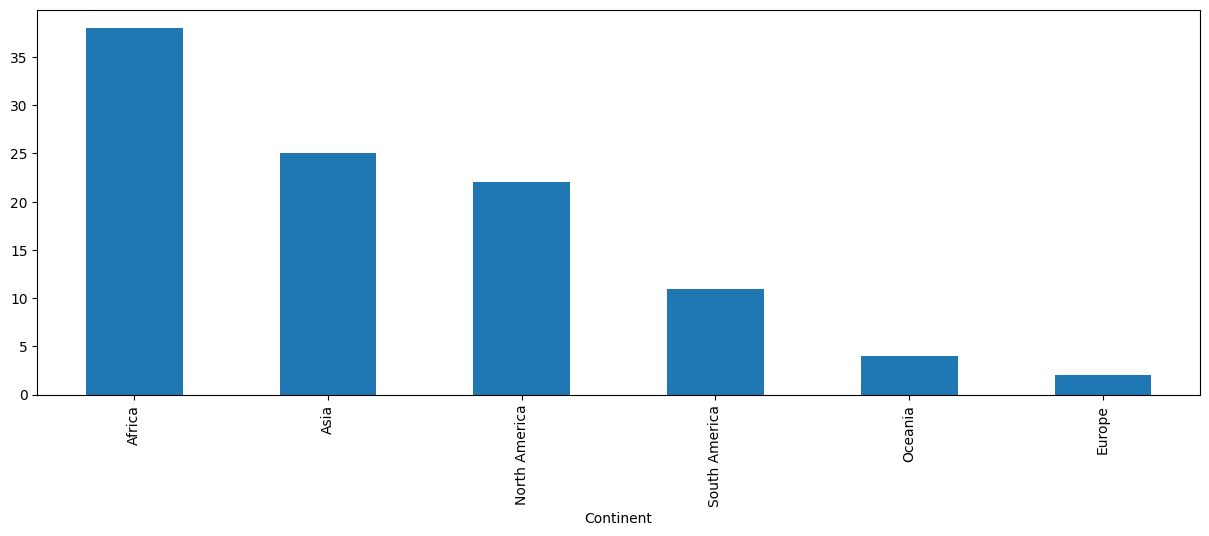

In [44]:
df['Continent'].value_counts().plot(kind='bar', figsize=(15, 5))

In [45]:
len(df['Country'].unique())

102

In [46]:
df['Country'].value_counts()

,count
Country,
Brazil,1
India,1
China,1
Thailand,1
Pakistan,1
...,...
Spain,1
Lebanon,1
Singapore,1


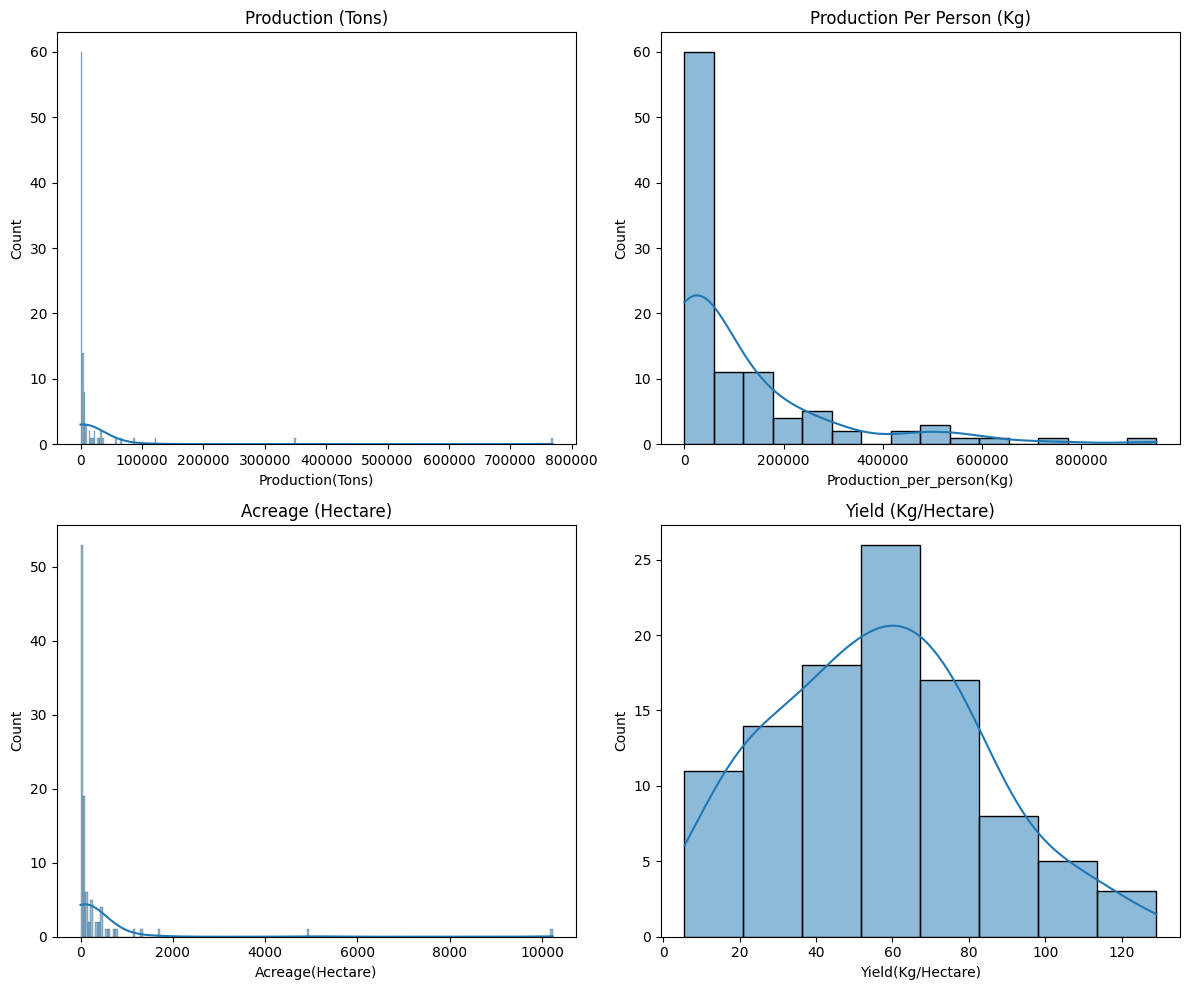

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

# Plot 1
plt.subplot(2, 2, 1)
sns.histplot(df['Production(Tons)'], kde=True)
plt.title("Production (Tons)")

# Plot 2
plt.subplot(2, 2, 2)
sns.histplot(df['Production_per_person(Kg)'], kde=True)
plt.title("Production Per Person (Kg)")

# Plot 3
plt.subplot(2, 2, 3)
sns.histplot(df['Acreage(Hectare)'], kde=True)
plt.title("Acreage (Hectare)")

# Plot 4
plt.subplot(2, 2, 4)
sns.histplot(df['Yield(Kg/Hectare)'], kde=True)
plt.title("Yield (Kg/Hectare)")

plt.tight_layout()
plt.show()


In [48]:
['Country', 'Continent', 'Production(Tons)', 'Production_per_person(Kg)', 'Acreage(Hectare)', 'Yield(Kg/Hectare)']


['Country',
 'Continent',
 'Production(Tons)',
 'Production_per_person(Kg)',
 'Acreage(Hectare)',
 'Yield(Kg/Hectare)']

In [49]:
print(df.columns.tolist())


['Country', 'Continent', 'Production(Tons)', 'Production_per_person(Kg)', 'Acreage(Hectare)', 'Yield(Kg/Hectare)']


In [50]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,102.000000,102.000000,102.000000,102.000000
mean,18532.566402,112652.907671,296.808931,56.190931
std,84185.162016,176841.911118,1133.963002,27.569322
min,1.000000,0.000000,0.000000,5.577800
25%,166.757000,1304.000000,10.583000,36.809325
50%,1440.044000,25572.500000,51.238500,55.679950
75%,6426.823750,146384.750000,136.754250,73.706675
max,768678.382000,951087.000000,10226.205000,129.049300


# Graph for Outliers
import seaborn as sns and import matplotlib.pyplot as plt: These lines import the necessary libraries for data visualization. seaborn is built on top of matplotlib and provides a higher-level interface for creating attractive statistical graphics.

<b>cols = [...]:</b> This line defines a list named cols containing the names of the DataFrame columns you want to analyze for outliers. These are 'Production(Tons)', 'Production_per_person(Kg)', 'Acreage(Hectare)', and 'Yield(Kg/Hectare)'.

<b>for col in cols::</b> This loop iterates through each column name in the cols list. For each column, the following actions are performed:

<b>plt.figure(figsize=(10, 4)):</b> This creates a new figure (a blank canvas) for each box plot. figsize=(10, 4) sets the width of the figure to 10 inches and the height to 4 inches, which is useful for controlling the plot's size and readability.

<b>sns.boxplot(x=df[col]):</b> This is the core of the plotting. sns.boxplot() generates a box plot. By setting x=df[col], it tells Seaborn to create a horizontal box plot for the data in the current column (col) from your DataFrame (df). Box plots are excellent for visualizing the distribution of numerical data and clearly showing potential outliers.

<b>plt.title(f"Outliers in {col}"):</b> This sets the title for the current box plot. The f-string dynamically inserts the column name into the title, making it clear which column the plot represents.

<b>plt.xlabel(col):</b> This sets the label for the x-axis of the current plot, again using the column name.

<b>plt.show():</b> This command displays the generated plot. Without plt.show(), the plots might not appear, or they might all be displayed together at the very end.

In summary, this code systematically creates a separate box plot for each of the specified numerical columns, allowing you to visually inspect the distribution of values and easily identify any data points that fall far outside the typical range, which are considered outliers.


Visual Outlier Detection Using Boxplot


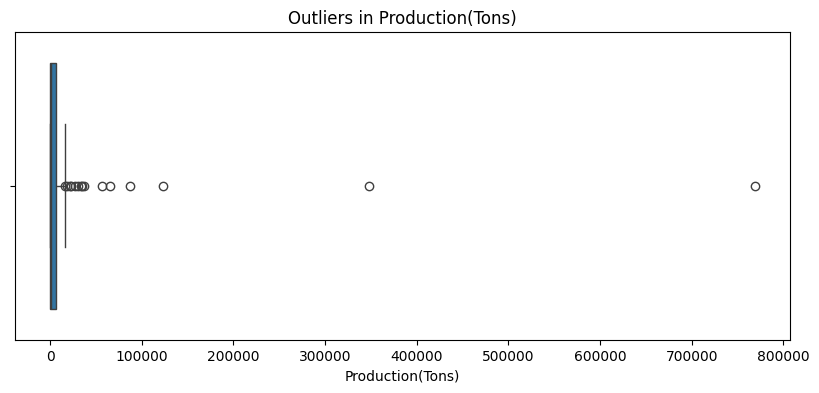

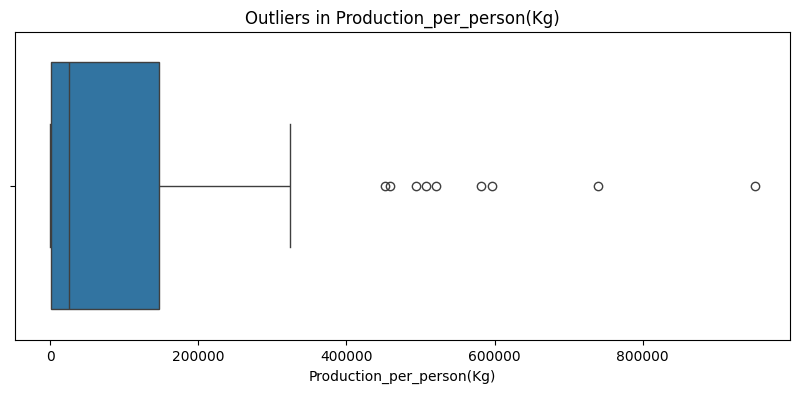

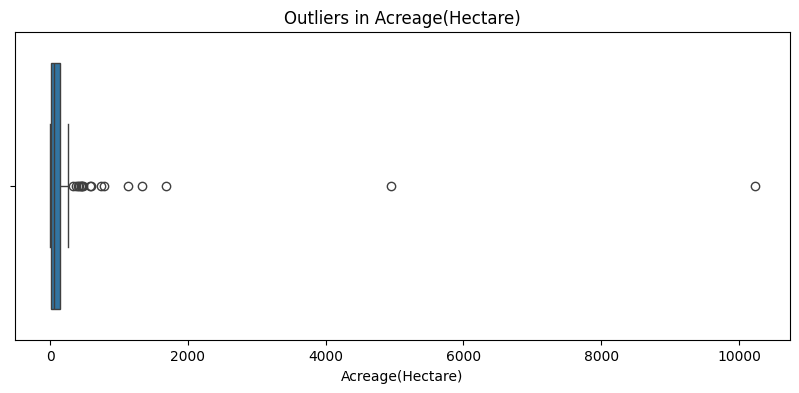

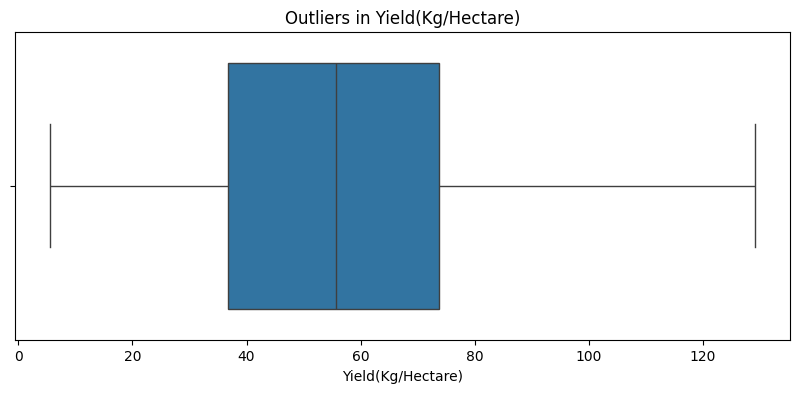

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = [
    'Production(Tons)',
    'Production_per_person(Kg)',
    'Acreage(Hectare)',
    'Yield(Kg/Hectare)'
]

for col in cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.xlabel(col)
    plt.show()


# Outliers
This code snippet helps in identifying outliers in specific numerical columns of your DataFrame using a statistical method called the Interquartile Range (IQR). Here's a breakdown:

import pandas as pd: This line imports the pandas library, which is essential for working with DataFrames.

cols = [...]: This list defines the names of the columns you want to check for outliers: 'Production(Tons)', 'Production_per_person(Kg)', 'Acreage(Hectare)', and 'Yield(Kg/Hectare)'.

for col in cols:: The code then loops through each column specified in the cols list. For each column, it performs the following steps to find outliers:

Q1 = df[col].quantile(0.25): Calculates the first quartile (Q1) for the current column. Q1 represents the 25th percentile of the data, meaning 25% of the values are below this point.

Q3 = df[col].quantile(0.75): Calculates the third quartile (Q3) for the current column. Q3 represents the 75th percentile of the data, meaning 75% of the values are below this point (or 25% are above it).

IQR = Q3 - Q1: Calculates the Interquartile Range (IQR). The IQR is the range between the first and third quartiles and represents the middle 50% of the data. It's a measure of statistical dispersion.

lower = Q1 - 1.5 * IQR and upper = Q3 + 1.5 * IQR: These lines define the lower and upper bounds for identifying outliers. Any data point that falls below the lower bound or above the upper bound is considered an outlier. The 1.5 * IQR rule is a commonly used convention for outlier detection.

outliers = df[(df[col] < lower) | (df[col] > upper)][col]: This line filters the DataFrame to find all values in the current column (df[col]) that are either less than the lower bound OR greater than the upper bound. These are your identified outliers.

print(...): Finally, the code prints a formatted output for each column, showing:

The name of the column.
The calculated Lower Bound.
The calculated Upper Bound.
The Outliers Count (how many outliers were found).
The actual Outlier Values themselves.
In essence, this code systematically applies the IQR method to each specified numerical column to programmatically detect and list potential outliers.



In [52]:
import pandas as pd

cols = [
    'Production(Tons)',
    'Production_per_person(Kg)',
    'Acreage(Hectare)',
    'Yield(Kg/Hectare)'
]

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]

    print("\n-----------------------------")
    print(f"Column: {col}")
    print(f"Lower Bound: {lower}")
    print(f"Upper Bound: {upper}")
    print(f"Outliers Count: {len(outliers)}")
    print("Outlier Values:")
    print(outliers.to_string(index=False))



-----------------------------
Column: Production(Tons)
Lower Bound: -9223.343125000001
Upper Bound: 15816.923875
Outliers Count: 15
Outlier Values:
768678.382
348448.000
123059.739
 87468.496
 65450.704
 56446.821
 36951.213
 34403.004
 33533.403
 29926.210
 27158.830
 22370.546
 21990.823
 18890.972
 16313.145

-----------------------------
Column: Production_per_person(Kg)
Lower Bound: -216317.125
Upper Bound: 364005.875
Outliers Count: 9
Outlier Values:
452524.0
740075.0
494237.0
507518.0
951087.0
459519.0
581814.0
521254.0
597066.0

-----------------------------
Column: Acreage(Hectare)
Lower Bound: -178.67387500000004
Upper Bound: 326.01112500000005
Outliers Count: 17
Outlier Values:
10226.205
 4950.000
 1675.215
 1336.575
 1130.820
  781.054
  416.626
  447.204
  370.530
  472.693
  410.104
  331.699
  442.307
  732.000
  467.000
  598.000
  584.000

-----------------------------
Column: Yield(Kg/Hectare)
Lower Bound: -18.536699999999982
Upper Bound: 129.05269999999996
Outliers 

which country producing max sugarcane

In [53]:
df_new = df[["Country", "Production(Tons)"]].set_index("Country")


In [54]:
df_new

,Production(Tons)
Country,
Brazil,768678.382
India,348448.000
China,123059.739
Thailand,87468.496
Pakistan,65450.704
...,...
Spain,394.000
Lebanon,97.000
Singapore,50.000


In [55]:
df_new = df[["Country", "Production(Tons)"]].set_index("Country")
df_new["Percent"] = df_new["Production(Tons)"] * 100 / df_new["Production(Tons)"].sum()


In [56]:
df_new

,Production(Tons),Percent
Country,,
Brazil,768678.382,40.663891
India,348448.000,18.433264
China,123059.739,6.509989
Thailand,87468.496,4.627175
Pakistan,65450.704,3.462411
...,...,...
Spain,394.000,0.020843
Lebanon,97.000,0.005131
Singapore,50.000,0.002645


In [57]:
df_new['Production(Tons)_percent'] = df_new['Production(Tons)'] / df_new['Production(Tons)'].sum() * 100

In [58]:
df_new

,Production(Tons),Percent,Production(Tons)_percent
Country,,,
Brazil,768678.382,40.663891,40.663891
India,348448.000,18.433264,18.433264
China,123059.739,6.509989,6.509989
Thailand,87468.496,4.627175,4.627175
Pakistan,65450.704,3.462411,3.462411
...,...,...,...
Spain,394.000,0.020843,0.020843
Lebanon,97.000,0.005131,0.005131
Singapore,50.000,0.002645,0.002645


##Which Country Produces more

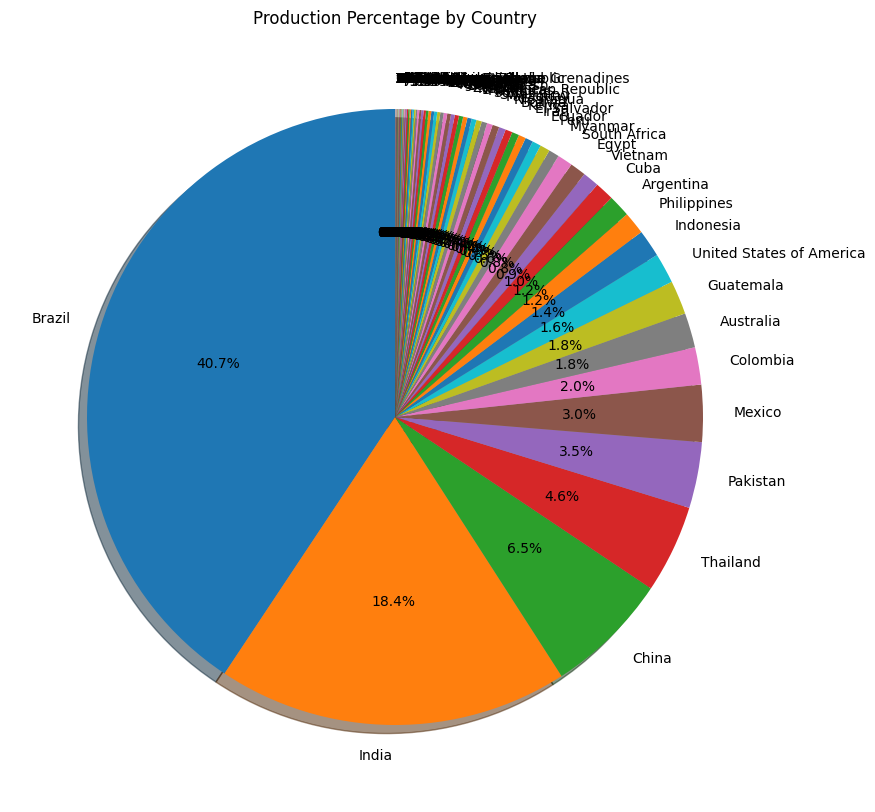

In [59]:
df_new['Production(Tons)_percent'].plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
plt.ylabel("")   # optional – removes y-label
plt.title("Production Percentage by Country")
plt.show()


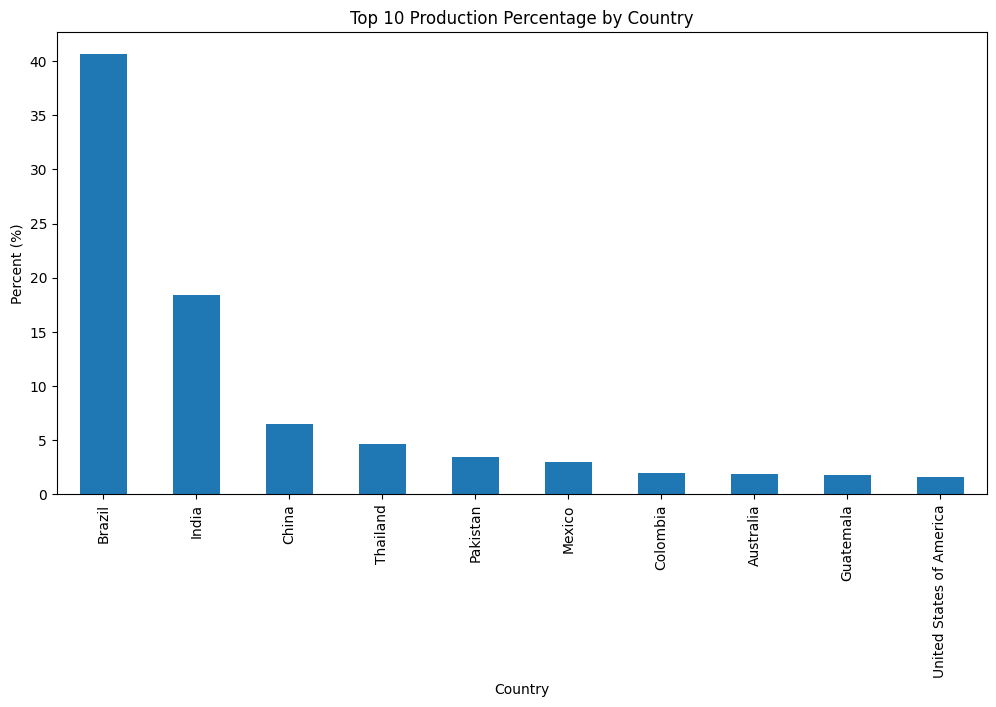

In [60]:
df_new['Production(Tons)_percent'].sort_values(ascending=False).head(10).plot(
    kind='bar',
    figsize=(12, 6)
)

plt.title("Top 10 Production Percentage by Country")
plt.xlabel("Country")
plt.ylabel("Percent (%)")
plt.show()


/tmp/ipython-input-4048775652.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


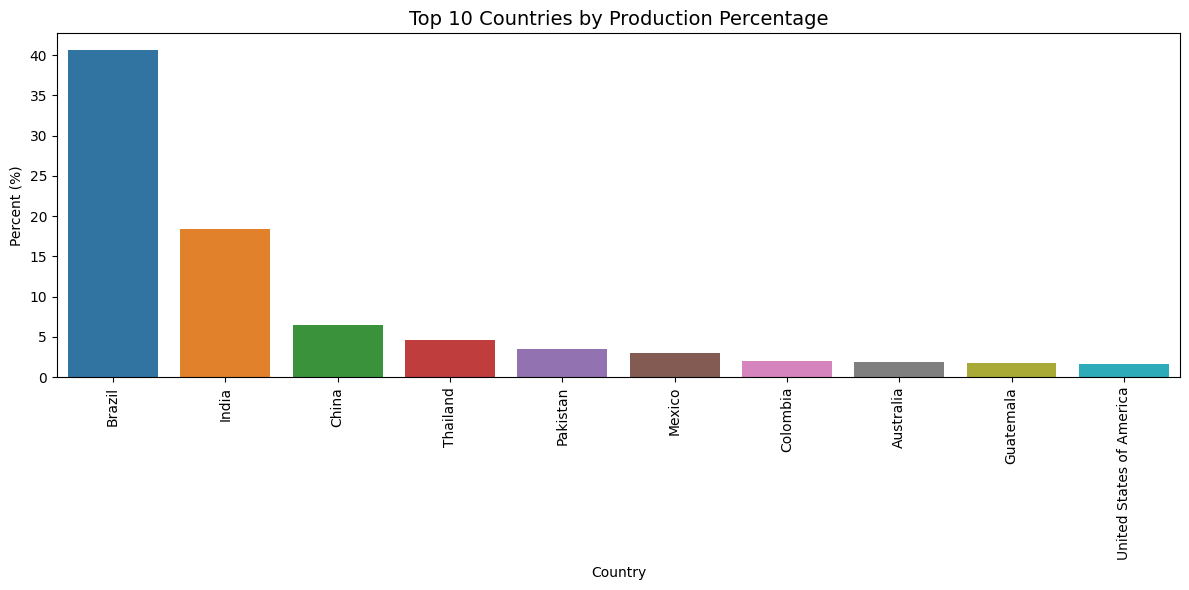

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

top10 = df_new['Production(Tons)_percent'].sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top10.index,
    y=top10.values,
    palette="tab10"    # 🔥 20 different colors
)

plt.title("Top 10 Countries by Production Percentage", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Percent (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Which Country has highest land

/tmp/ipython-input-2205820894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-2205820894.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


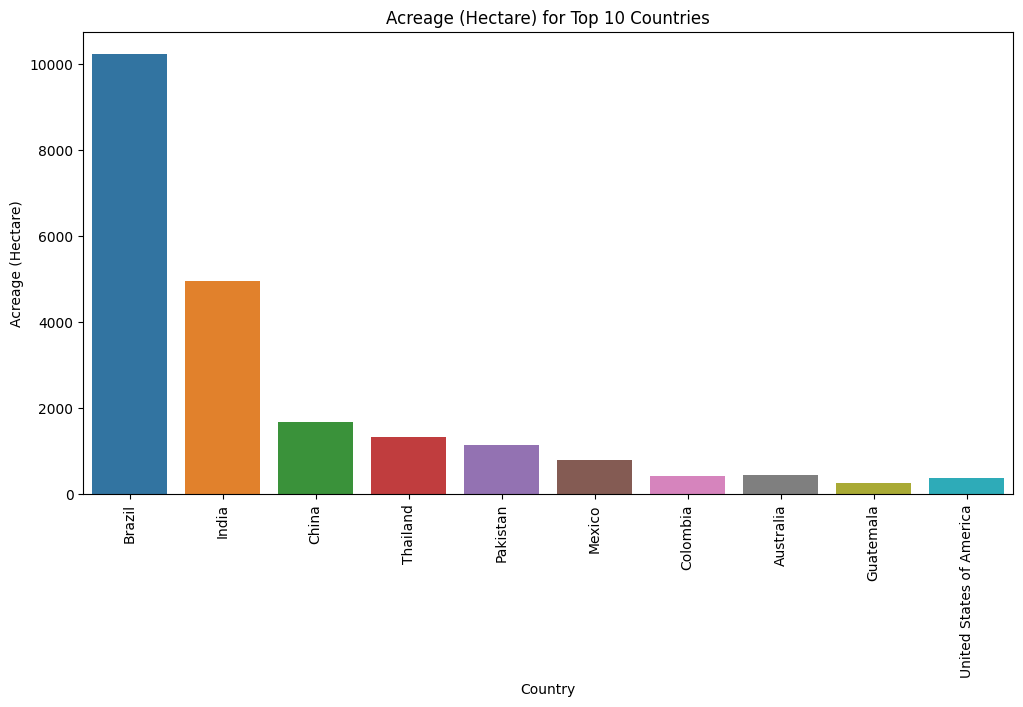

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

ax = sns.barplot(
    data=df.head(10),
    x='Country',
    y='Acreage(Hectare)',
    palette='tab10'   # <-- colorful palette
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Acreage (Hectare) for Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Acreage (Hectare)")

plt.show()


#Which country has highest yield per hectare?


/tmp/ipython-input-2860594357.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


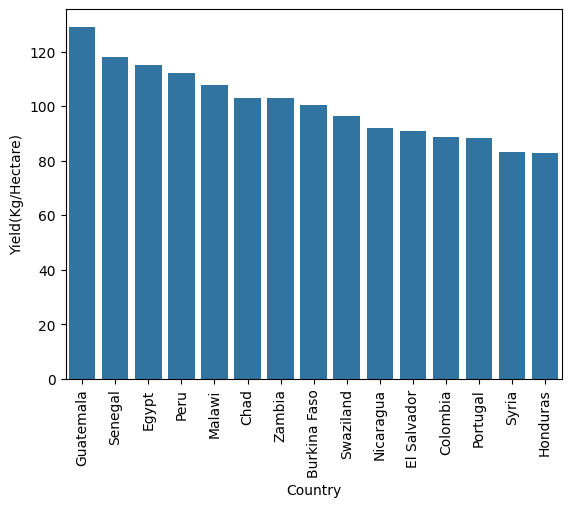

In [80]:
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

##Production Tons, Production_per_person

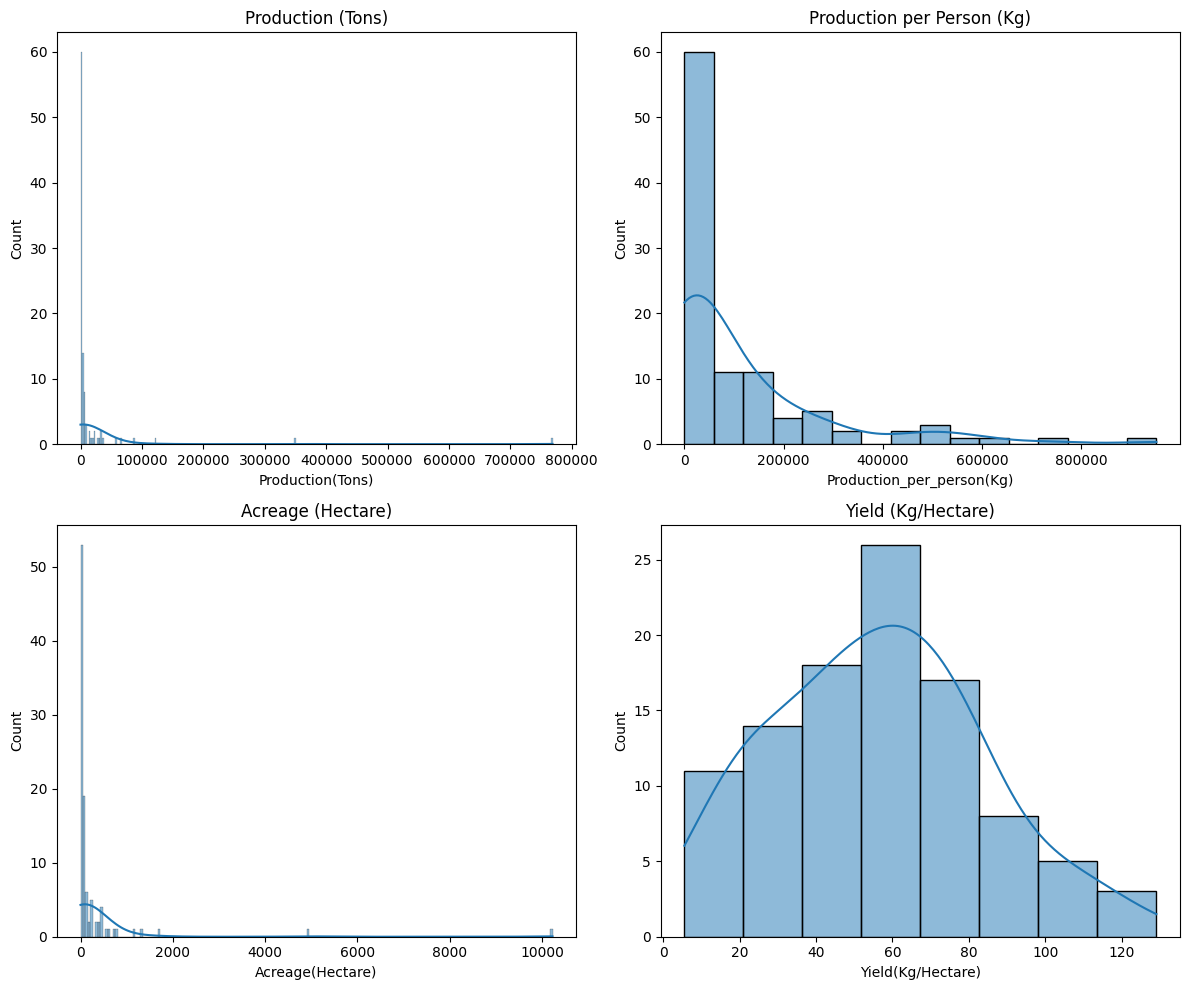

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Production(Tons)'], kde=True)
plt.title("Production (Tons)")

plt.subplot(2, 2, 2)
sns.histplot(df['Production_per_person(Kg)'], kde=True)
plt.title("Production per Person (Kg)")

plt.subplot(2, 2, 3)
sns.histplot(df['Acreage(Hectare)'], kde=True)
plt.title("Acreage (Hectare)")

plt.subplot(2, 2, 4)
sns.histplot(df['Yield(Kg/Hectare)'], kde=True)
plt.title("Yield (Kg/Hectare)")

plt.tight_layout()
plt.show()


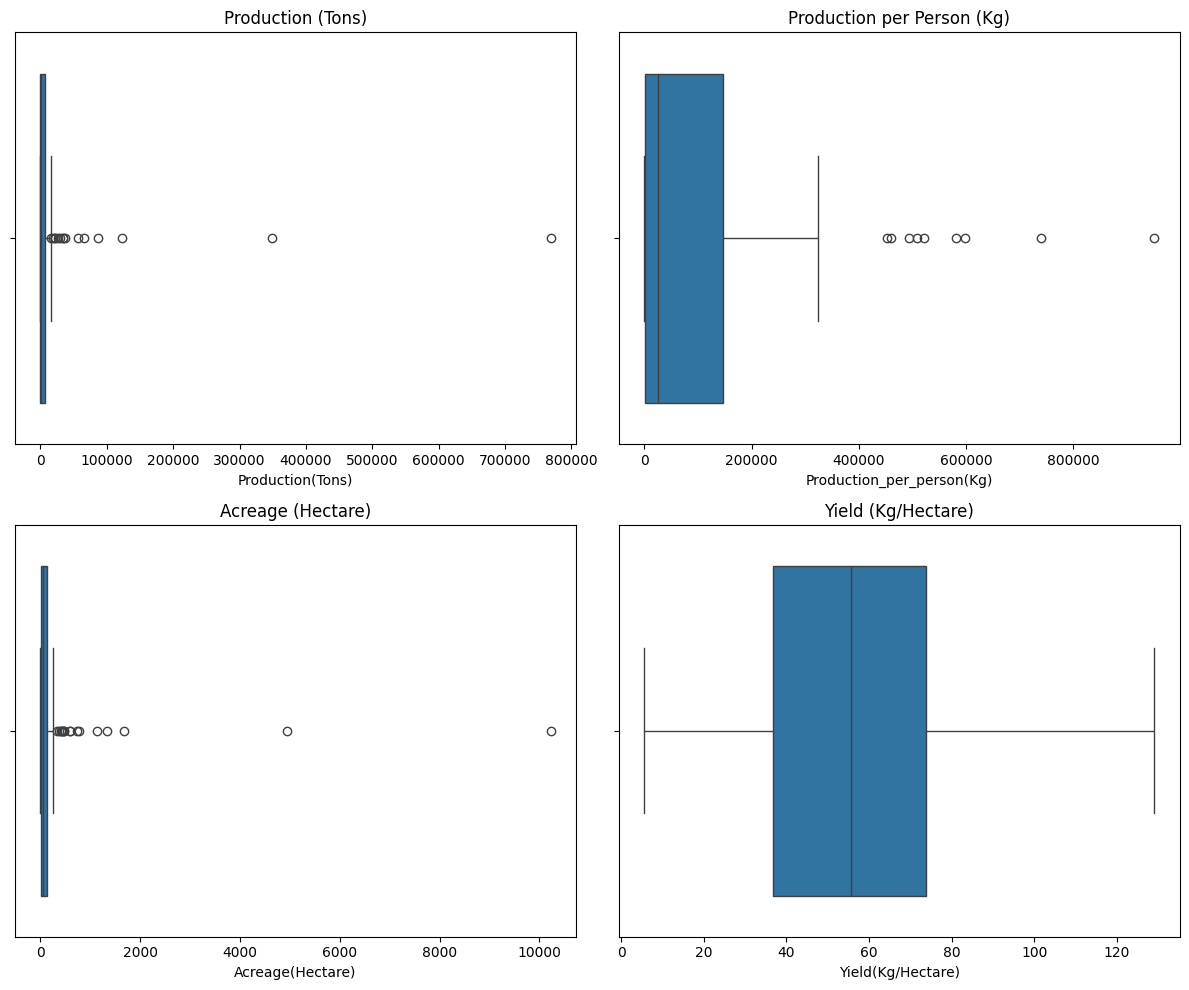

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x=df['Production(Tons)'])
plt.title("Production (Tons)")

plt.subplot(2, 2, 2)
sns.boxplot(x=df['Production_per_person(Kg)'])
plt.title("Production per Person (Kg)")

plt.subplot(2, 2, 3)
sns.boxplot(x=df['Acreage(Hectare)'])
plt.title("Acreage (Hectare)")

plt.subplot(2, 2, 4)
sns.boxplot(x=df['Yield(Kg/Hectare)'])
plt.title("Yield (Kg/Hectare)")

plt.tight_layout()
plt.show()


<Axes: ylabel='Production(Tons)'>

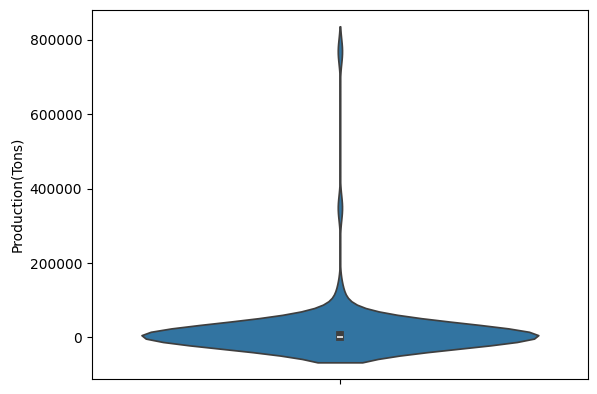

In [75]:
sns.violinplot(df["Production(Tons)"])



#Do countries with highest land produce more sugarcane?



<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

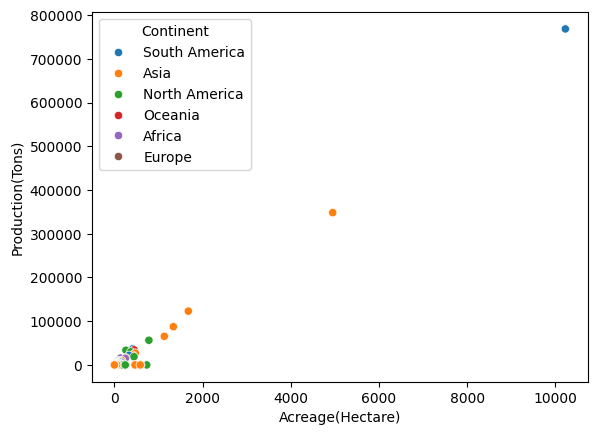

In [82]:
sns.scatterplot(data = df, x = "Acreage(Hectare)", y = "Production(Tons)", hue = "Continent" )


#
Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

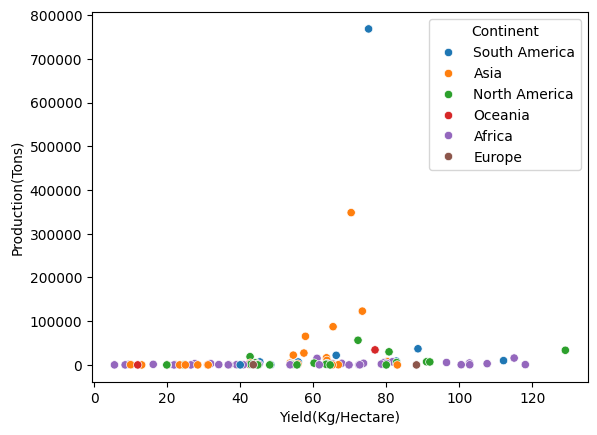

In [83]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)", y = "Production(Tons)", hue = "Continent" )

##Analysis for Continent


In [84]:
df_continent = df.groupby("Continent").sum()


In [85]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]


In [86]:
df_continent


,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89871.030,2.324825e+06,2397.499,2142.1075,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,722994.576,1.856506e+06,12031.921,1226.8164,25
Europe,PortugalSpain,399.429,5.360000e+02,71.000,131.8709,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,174915.027,3.784457e+06,3735.719,1335.7274,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36189.562,2.546413e+04,491.908,162.4191,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865952.149,3.498809e+06,11546.464,732.5337,11


#Which country produces maximum sugarcane?


In [76]:
df_new = df[["Country","Production(Tons)"]].set_index("Country")


In [77]:
df_new


,Production(Tons)
Country,
Brazil,768678.382
India,348448.000
China,123059.739
Thailand,87468.496
Pakistan,65450.704
...,...
Spain,394.000
Lebanon,97.000
Singapore,50.000


In [78]:
df_new["Production(Tons)_percent"] = df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()


In [79]:
df_new


,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678.382,40.663891
India,348448.000,18.433264
China,123059.739,6.509989
Thailand,87468.496,4.627175
Pakistan,65450.704,3.462411
...,...,...
Spain,394.000,0.020843
Lebanon,97.000,0.005131
Singapore,50.000,0.002645


In [63]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [64]:
x=df.drop(columns=['Country','Continent','Yield(Kg/Hectare)'])
y=df['Yield(Kg/Hectare)']

In [65]:
model=LinearRegression()

In [66]:
model.fit(x,y)

LinearRegression()

In [67]:
production_tons = float(input("Enter Production (Tons):"))
production_per_person_kg = float(input("Enter Production per Person (Kg):"))
acreage_hectare = float(input("Enter Acreage (Hectare):"))

predict_model = model.predict([[production_tons, production_per_person_kg, acreage_hectare]])
print(f"Predicted Yield (Kg/Hectare): {predict_model[0]:.2f}")

KeyboardInterrupt: Interrupted by user